# Quickstart

*prose* contains the structure to build astronomical images pipelines. Here is a quick example pipeline to characterize the point-spread-function (PSF) of an example image

In [1]:
from prose import Sequence, blocks
from prose.tutorials import example_image
import matplotlib.pyplot as plt

# getting the example image
image = example_image()

sequence = Sequence([
    blocks.SegmentedPeaks(),  # stars detection
    blocks.Cutouts(size=21),  # cutouts extraction
    blocks.MedianPSF(),       # PSF building
    blocks.Moffat2D(),        # PSF modeling
])

sequence.run([image])

RUN 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 29.38images/s]


We first assembled a series of `Blocks` in a `Sequence`, that we ran on a list containing our single `Image`. prose contains a wide variety of blocks implementing methods and algorithms commonly used in astronomical image processing.

Let's plot the results from the `Image` attributes

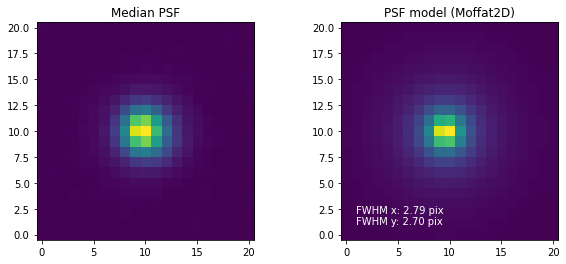

In [2]:
# plotting
# --------
plt.figure(None, (10, 4))

plt.subplot(1, 2, 1, title="Median PSF")
plt.imshow(image.psf, origin="lower")

plt.subplot(1, 2, 2, title=f"PSF model ({image.psf_model_block})")
plt.imshow(image.psf_model, origin="lower")
_ = plt.text(1, 1, f"FWHM x: {image.fwhmx:.2f} pix\nFWHM y: {image.fwhmy:.2f} pix", c="w")